In [4]:
import xarray as xr
import numpy as np
from datetime import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [5]:
filename = '/home/duarte/Documentos/mestrado-INPE/aulas/termodinamica/lista_3/cloud.nc'
ds = xr.open_dataset(filename)

In [6]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:    (longitude: 1440, latitude: 721, time: 144)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1kB 2015-04-07 ... 2015-04-12T23:00:00
Data variables:
    hcc        (time, latitude, longitude) float32 598MB ...
    lcc        (time, latitude, longitude) float32 598MB ...
    mcc        (time, latitude, longitude) float32 598MB ...
    tcc        (time, latitude, longitude) float32 598MB ...
    tp         (time, latitude, longitude) float32 598MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-03 02:54:20 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [7]:
lat = ds.latitude
lon = ds.longitude

In [8]:
tcc = ds.variables['tcc'][:]
#tcc_mean= np.mean(tcc[:,:,:],axis = 0)

In [9]:
plt.figure()
map = Basemap(projection="cyl", resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
map.drawcoastlines(color="black")
lons,lats = np.meshgrid(ds.variables['longitude'][:], ds.variables['latitude'][:])
x,y = map(lons, lats)
temp_plot = map.contourf(x, y, tcc, cmap=plt.cm.viridis)
cb = map.colorbar(temp_plot, "bottom", size="5%", pad="2%", extend = 'both')
cb.set_label(u"Temperature \u2103")
plt.title("Mean Temperature (1901-2017)")
plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=6)
plt.show()

In [3]:
tcc = ds.lcc[1,:,:]

NameError: name 'ds' is not defined

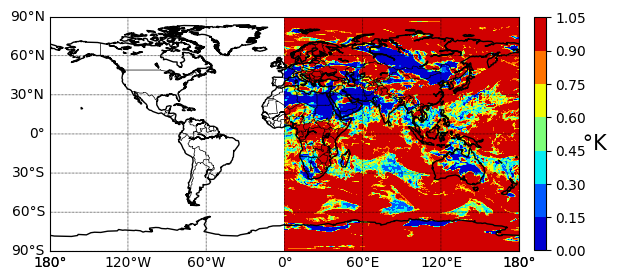

In [17]:
# Cria uma instância do mapa
m = Basemap(projection='cyl', resolution='c')

# Desenha as características do mapa
m.drawcoastlines()
m.drawcountries()

# Desenha paralelos e meridianos
parallels = np.arange(-90., 91., 30.)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(-180., 181., 60.)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

cf = plt.contourf(lon, lat, tcc, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.03)
cb.set_label(' \u00b0K', fontsize=15, rotation=0)
plt.show()



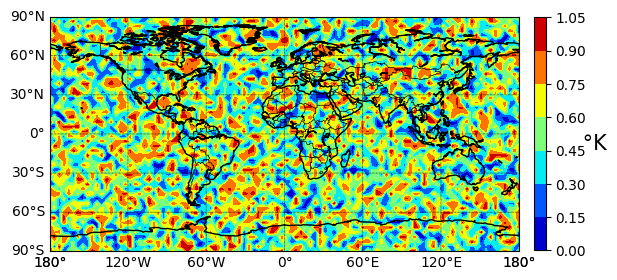

In [2]:
# Definindo a grade de longitude e latitude
lon = np.linspace(-180, 180, 100)
lat = np.linspace(-90, 90, 50)
lon, lat = np.meshgrid(lon, lat)  # Convertendo para grade 2D

# Suponha que 'tcc' seja uma grade 2D de valores de uma variável qualquer
# Aqui, estou apenas gerando valores aleatórios para 'tcc'
tcc = np.random.rand(50, 100)  # Substitua isto pelos seus dados reais

# Cria uma instância do mapa
m = Basemap(projection='cyl', resolution='c',
            llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90)

# Desenha as características do mapa
m.drawcoastlines()
m.drawcountries()

# Desenha paralelos e meridianos
parallels = np.arange(-90., 91., 30.)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(-180., 181., 60.)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

# Plota a variável no mapa
cf = m.contourf(lon, lat, tcc, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.03)
cb.set_label(' \u00b0K', fontsize=15, rotation=0)
plt.show()
